In [ ]:
#Houhmand Esmaeilpourarabi
#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

## Getting Familiar with the Data


In [2]:
import pandas as pd
data_dir = ""
car_df_train = pd.read_csv("results1.csv")
car_df_train.head()

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode,log_price
0,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,66203,9.581559
1,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,89107,9.581559
2,2015,Acura,TLX V6 Advance,USED,29317,14969.0,Automatic,White,Gray,FWD,89107,9.613737
3,2016,Acura,ILX Technology Plus Package,USED,22732,13999.0,Automatic,White,Black,FWD,99115,9.546741
4,2019,Acura,MDX Sport Hybrid 3.0L w/Advance Package,USED,0,40945.0,Automatic,Black,Black,AWD,66203,10.619985


## Some visualization of futures of the dataset

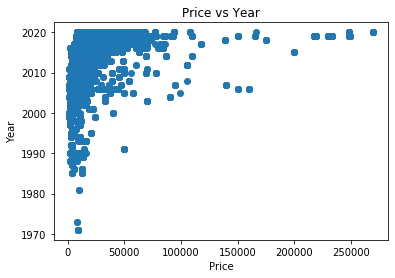

In [3]:
fig=plt.figure()
plt.scatter(car_df_train.Price, car_df_train.Year)
axis = fig.gca() #get current axis
axis.set_title('Price vs Year')
axis.set_xlabel('Price')
axis.set_ylabel('Year')
fig.canvas.draw()

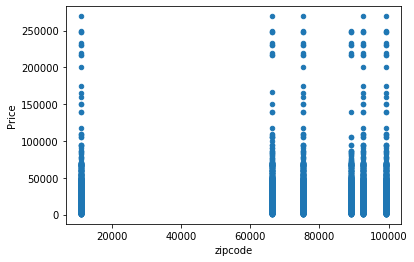

In [4]:
car_df_train.plot.scatter(x="zipcode", y="Price")

# Relationships between Derivtrain and zipcode

In [5]:
Derivtrain_df_train = car_df_train.groupby(['zipcode','Derivtrain'])['Derivtrain'].agg(['count']).reset_index()
Derivtrain_df_train.head(2)

,zipcode,Derivtrain,count
0,11101,4x4/4-wheel drive,200
1,11101,AWD,677


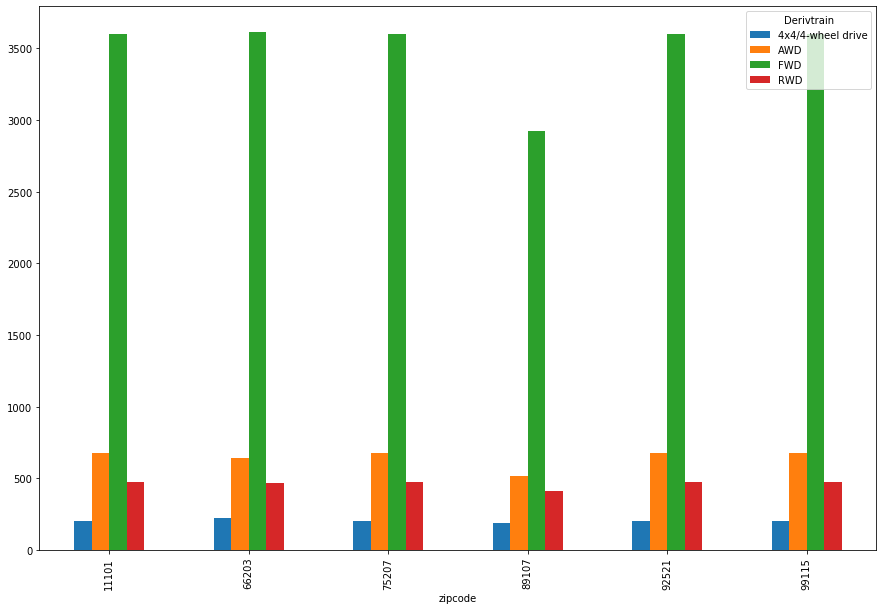

In [6]:
Derivtrain_counts = Derivtrain_df_train.pivot_table(
    index="Derivtrain", columns="zipcode",
    values="count"  
    
)
Derivtrain_counts = Derivtrain_counts.fillna(0)
Derivtrain_counts.T.plot.bar(figsize=(15,10))

As we can see in the plot bar FWD cars are extremly more in each area(zip code), zipcode(89107) which is Nevada zip code, has less FWD car compare to others. Therefore FWD cars are much more popular in each zip code.  

# Relationships between Zipcode and Body color

In [7]:
EXT_COLOR_df_train = car_df_train.groupby(['zipcode','EXT_COLOR'])['EXT_COLOR'].agg(['count']).reset_index()
EXT_COLOR_df_train.head()

,zipcode,EXT_COLOR,count
0,11101,Beige,84
1,11101,Black,1003
2,11101,Blue,392
3,11101,Brown,23
4,11101,Gold,18


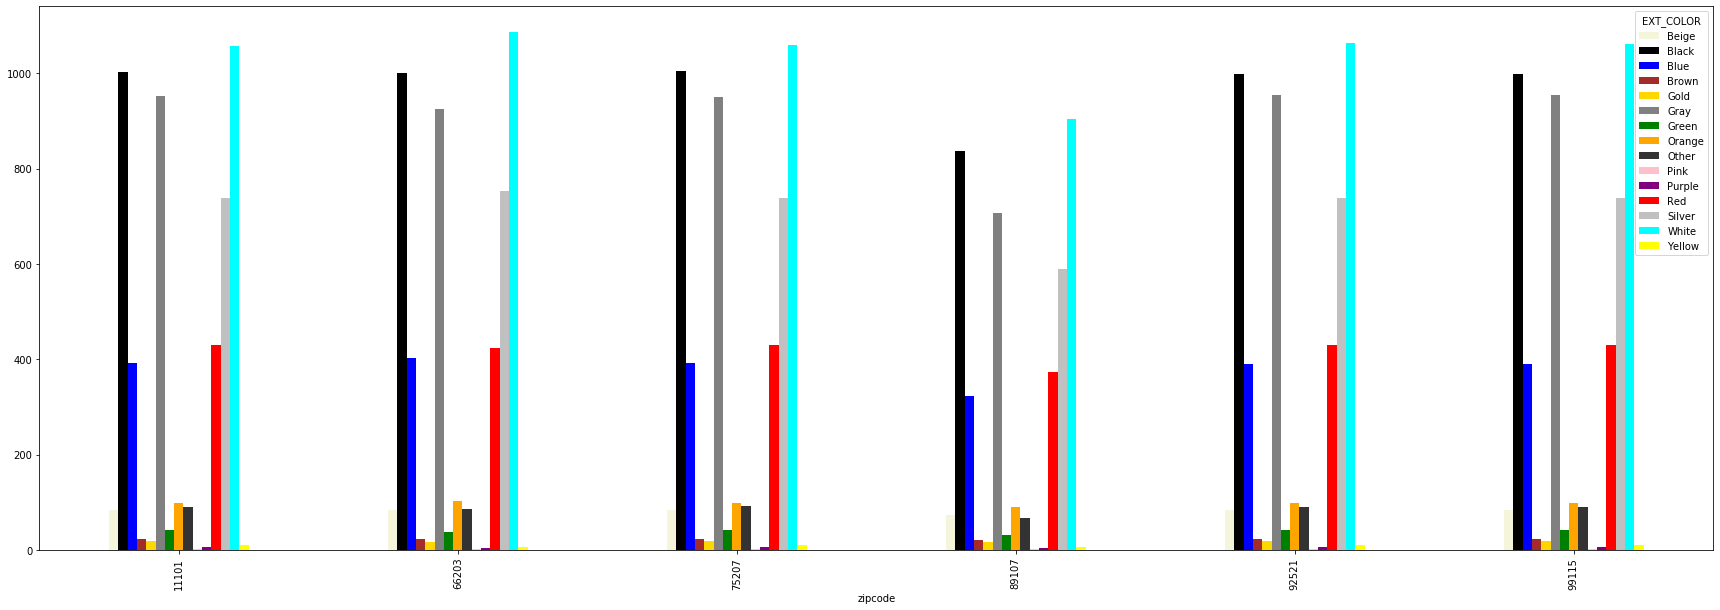

In [8]:
import matplotlib.pyplot as plt

EXT_COLOR_counts = EXT_COLOR_df_train.pivot_table(
    index="EXT_COLOR", columns="zipcode",
    values="count"  
    
)
color_dict = {'Beige': 'beige', 'Black': 'black', 'Blue': 'blue', 'Brown': 'brown',
             'Gold': 'gold', 'Gray': 'gray', 'Green': 'green', 'Orange': 'orange',
             'Pink': 'pink', 'Purple': 'purple', 'Red': 'red',
             'Silver': 'silver', 'White': 'aqua', 'Yellow': 'yellow'}
EXT_COLOR_counts = EXT_COLOR_counts.fillna(0)
#EXT_COLOR_counts.T.plot.bar()
#EXT_COLOR_counts.set_facecolor("lightslategray")
EXT_COLOR_counts.T.plot.bar(figsize=(30,10), color=[color_dict.get(x, '#333333') for x in EXT_COLOR_counts.T.columns])
plt.show()

The result is the same as our expectation respect to color, white, black, and gray colors are the most popular color in the market in each zipcode.  


# Building our model for Data analysis


In [9]:
car_df_train.shape
car_df_train.describe()

,Year,Mile,Price,zipcode,log_price
count,28786.000000,28786.000000,28786.000000,28786.000000,28786.000000
mean,2017.234732,18721.495553,18617.625756,71676.780171,9.666030
std,5.043858,35256.664730,15303.629327,29748.560237,0.565219
min,1971.000000,0.000000,999.000000,11101.000000,6.906755
25%,2017.000000,0.000000,12980.000000,66203.000000,9.471165
50%,2020.000000,0.000000,16665.000000,75207.000000,9.721066
75%,2020.000000,23581.250000,19396.000000,92521.000000,9.872822
max,2020.000000,261237.000000,269500.000000,99115.000000,12.504324


In [10]:
car_df_train.isna().sum()

Year           0
Brand          0
Model          0
Title          0
Mile           0
Price          0
Transmition    0
EXT_COLOR      0
INT_COLOR      0
Derivtrain     0
zipcode        0
log_price      0
dtype: int64

# Fit linear regression model for prediction
- Fisr we need to convert Devtrain categories value, lets convert it to 0/1 for the training dataset, and test dataset.
- Rename the zipcode to particular city and convert them to binary 0/1 for a better prediction.
- Fit our model and see our prediction

In [11]:
df_Derivtrain = pd.get_dummies(car_df_train['Derivtrain'])
car_df_train = pd.concat([car_df_train, df_Derivtrain], axis=1)
car_df_train

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode,log_price,4x4/4-wheel drive,AWD,FWD,RWD
0,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,66203,9.581559,0,0,1,0
1,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,89107,9.581559,0,0,1,0
2,2015,Acura,TLX V6 Advance,USED,29317,14969.0,Automatic,White,Gray,FWD,89107,9.613737,0,0,1,0
3,2016,Acura,ILX Technology Plus Package,USED,22732,13999.0,Automatic,White,Black,FWD,99115,9.546741,0,0,1,0
4,2019,Acura,MDX Sport Hybrid 3.0L w/Advance Package,USED,0,40945.0,Automatic,Black,Black,AWD,66203,10.619985,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28781,2012,smart,ForTwo Pure,USED,45872,7998.0,Automatic,White,Black,RWD,75207,8.986947,0,0,0,1
28782,2013,smart,ForTwo Pure,USED,32272,5980.0,Automatic,Black,Black,RWD,11101,8.696176,0,0,0,1
28783,2012,smart,ForTwo Pure,USED,45872,7998.0,Automatic,White,Black,RWD,99115,8.986947,0,0,0,1
28784,2012,smart,ForTwo Pure,USED,45672,6980.0,Automatic,Blue,Black,RWD,66203,8.850804,0,0,0,1


In [12]:
car_df_test = pd.read_csv("results1.csv")
df_Derivtrain = pd.get_dummies(car_df_test['Derivtrain'])
car_df_test = pd.concat([car_df_test, df_Derivtrain], axis=1)
car_df_test.head(6)

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,zipcode,log_price,4x4/4-wheel drive,AWD,FWD,RWD
0,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,66203,9.581559,0,0,1,0
1,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,89107,9.581559,0,0,1,0
2,2015,Acura,TLX V6 Advance,USED,29317,14969.0,Automatic,White,Gray,FWD,89107,9.613737,0,0,1,0
3,2016,Acura,ILX Technology Plus Package,USED,22732,13999.0,Automatic,White,Black,FWD,99115,9.546741,0,0,1,0
4,2019,Acura,MDX Sport Hybrid 3.0L w/Advance Package,USED,0,40945.0,Automatic,Black,Black,AWD,66203,10.619985,0,1,0,0
5,2014,Acura,ILX 2.0L,USED,61968,9000.0,Automatic,White,Black,FWD,66203,9.104980,0,0,1,0


In [13]:
car_df_train["Derivtrain"].value_counts()

FWD                  20938
AWD                   3859
RWD                   2778
4x4/4-wheel drive     1211
Name: Derivtrain, dtype: int64

In [14]:
car_df_train["AWD"].value_counts()


0    24927
1     3859
Name: AWD, dtype: int64

In [15]:
car_df_train = pd.concat([car_df_train,pd.get_dummies(car_df_train['zipcode'], prefix='zipcode',dummy_na=True)],axis=1)


car_df_train.rename(columns = {'zipcode_11101.0':'New York',
                           'zipcode_66203.0':'Kansas',
                           'zipcode_75207.0':'Texas',
                           'zipcode_89107.0':'Nevada',
                           'zipcode_92521.0':'Riverside',
                           'zipcode_99115.0':'Washington'}, inplace = True)

car_df_train.head(2)

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,...,AWD,FWD,RWD,New York,Kansas,Texas,Nevada,Riverside,Washington,zipcode_nan
0,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,...,0,1,0,0,1,0,0,0,0,0
1,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,...,0,1,0,0,0,0,1,0,0,0


In [16]:
car_df_test = pd.concat([car_df_test,pd.get_dummies(car_df_test['zipcode'], prefix='zipcode',dummy_na=True)],axis=1)
car_df_test.rename(columns = {'zipcode_11101.0':'New York',
                           'zipcode_66203.0':'Kansas',
                           'zipcode_75207.0':'Texas',
                           'zipcode_89107.0':'Nevada',
                           'zipcode_92521.0':'Riverside',
                           'zipcode_99115.0':'Washington'}, inplace = True)
car_df_test.head(2)

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,...,AWD,FWD,RWD,New York,Kansas,Texas,Nevada,Riverside,Washington,zipcode_nan
0,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,...,0,1,0,0,1,0,0,0,0,0
1,2017,Acura,ILX Base,USED,37874,14495.0,Automatic,White,Black,FWD,...,0,1,0,0,0,0,1,0,0,0


In [17]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_df_train[["AWD", "zipcode", "Mile"]],
    y=car_df_train["Price"]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
x_test = pd.Series()
x_test["AWD"] = 1
x_test["zipcode"] = 11101
x_test["Mile"] = 90000.0

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A AWD car with 90000 miles in New York can predict to be: $",result[0].round(2))

A AWD car with 90000 miles in New York can predict to be: $ 22865.01


**we can do this method in different way. As I did earlier I changed zipcode to boolean and specified each zipcode to one column. It helps us to predict our model faster and easier.**

In [19]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_df_train[["AWD", "Riverside", "Mile"]],
    y=car_df_train["Price"]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
x_test = pd.Series()
x_test["AWD"] = 1
x_test["Riverside"] = 1
x_test["Mile"] = 90000.0

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A AWD car with 90000 miles in Riverside can predict to be: $",result[0].round(2))

A AWD car with 90000 miles in Riverside can predict to be: $ 22880.26


**AS we see the result of these two area are really close to each other. Now lets look at different year and different model of cars, and predict them.**

In [21]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_df_train[["FWD", "Texas", "Mile", "Year"]],
    y=car_df_train["Price"]
)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
x_test = pd.Series()
x_test["FWD"] = 1
x_test["Texas"] = 1
x_test["Mile"] = 85000.0
x_test["Year"] = 2015

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD car with 85000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD car with 85000 miles in Riverside can predict to be: $ 6080.14


**How about we look into another zipcode and see what is our result!**

In [23]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_df_train[["FWD", "Nevada", "Mile", "Year"]],
    y=car_df_train["Price"]
)

x_test = pd.Series()
x_test["FWD"] = 1
x_test["Nevada"] = 1
x_test["Mile"] = 85000.0
x_test["Year"] = 2015

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD car with 85000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD car with 85000 miles in Riverside can predict to be: $ 5889.54


**As we can see our prediction is much better than the first one since we add one more field(Year), How about we add another field for our prediction, like Brand. To do this we need to reduce our brands, then use the boolean expression for comparison.** 


In [24]:
grp = car_df_train.groupby('Brand') 
car_train = grp.filter(lambda x: len(x) >= 400)
car_train['Brand'].value_counts()

Chevrolet    14584
Nissan        3118
Ford          1484
Hyundai        803
Dodge          666
Cadillac       630
Chrysler       504
Honda          456
Toyota         445
Kia            426
Buick          420
Name: Brand, dtype: int64

In [25]:
grp = car_df_test.groupby('Brand') 
car_test = grp.filter(lambda x: len(x) >= 400)
car_test['Brand'].value_counts()

Chevrolet    14584
Nissan        3118
Ford          1484
Hyundai        803
Dodge          666
Cadillac       630
Chrysler       504
Honda          456
Toyota         445
Kia            426
Buick          420
Name: Brand, dtype: int64

In [26]:
df_brand = pd.get_dummies(car_train['Brand'])
car_train = pd.concat([car_train, df_brand], axis=1)
car_train.head(2)

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,...,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,Hyundai,Kia,Nissan,Toyota
1010,2002,Buick,Rendezvous CX,USED,90002,2999.0,Automatic,Other,Gray,FWD,...,0,0,0,0,0,0,0,0,0,0
1011,2016,Buick,Encore Convenience,USED,24000,13500.0,Automatic,Other,Other,AWD,...,0,0,0,0,0,0,0,0,0,0


In [27]:
df_brand = pd.get_dummies(car_test['Brand'])
car_test = pd.concat([car_test, df_brand], axis=1)
car_test.head(2)

,Year,Brand,Model,Title,Mile,Price,Transmition,EXT_COLOR,INT_COLOR,Derivtrain,...,Cadillac,Chevrolet,Chrysler,Dodge,Ford,Honda,Hyundai,Kia,Nissan,Toyota
1010,2002,Buick,Rendezvous CX,USED,90002,2999.0,Automatic,Other,Gray,FWD,...,0,0,0,0,0,0,0,0,0,0
1011,2016,Buick,Encore Convenience,USED,24000,13500.0,Automatic,Other,Other,AWD,...,0,0,0,0,0,0,0,0,0,0


In [28]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_train[["FWD", "Riverside", "Mile", "Year", "Toyota"]],
    y=car_train["Price"]
)

x_test = pd.Series()
x_test["FWD"] = 1
x_test["Riverside"] = 1
x_test["Mile"] = 85000.0
x_test["Year"] = 2015
x_test["Toyota"] = 1

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD Toyota car with 85000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD Toyota car with 85000 miles in Riverside can predict to be: $ 10593.4


In [29]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_train[["FWD", "Riverside", "Mile", "Year", "Chevrolet"]],
    y=car_train["Price"]
)

x_test = pd.Series()
x_test["FWD"] = 1
x_test["Riverside"] = 1
x_test["Mile"] = 85000.0
x_test["Year"] = 2015
x_test["Chevrolet"] = 1

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD Chevrolet car with 85000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD Chevrolet car with 85000 miles in Riverside can predict to be: $ 6286.61


In [30]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_train[["FWD", "Kansas", "Mile", "Year", "Toyota"]],
    y=car_train["Price"]
)

x_test = pd.Series()
x_test["FWD"] = 1
x_test["Kansas"] = 1
x_test["Mile"] = 85000.0
x_test["Year"] = 2015
x_test["Toyota"] = 1

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD Chevrolet car with 85000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD Chevrolet car with 85000 miles in Riverside can predict to be: $ 10581.53


In [31]:
from sklearn.linear_model import LinearRegression

ashen_model = LinearRegression()
ashen_model.fit(
    X=car_train[["FWD", "Riverside", "Mile", "Year", "Ford"]],
    y=car_train["Price"]
)

x_test = pd.Series()
x_test["FWD"] = 1
x_test["Riverside"] = 1
x_test["Mile"] = 45000.0
x_test["Year"] = 2019
x_test["Ford"] = 1

result = ashen_model.predict(X=pd.DataFrame([x_test]))
print("A FWD Ford car with 45000 miles in Riverside can predict to be: $",result[0].round(2))

A FWD Ford car with 45000 miles in Riverside can predict to be: $ 15378.21


**Zipcode matter sometimes, in some brand and some specification of cars. The most important part of this prediction can address; are brands and years. When I added them into my model I could get a better result, and these two categories are really matter when someone looking for a car.**


In [32]:
from sklearn.linear_model import LinearRegression

X_train = car_df_train[["Price"]]
X_test = car_df_test[["Price"]]
y_train = car_df_train["Mile"]

model = LinearRegression(fit_intercept= False)
model.fit(X=X_train, y=y_train)
answer = model.predict(X=X_test)
print(answer)

[5297.52438424 5297.52438424 5470.75836549 ... 2923.04932909 2550.9982892
 2922.68385656]


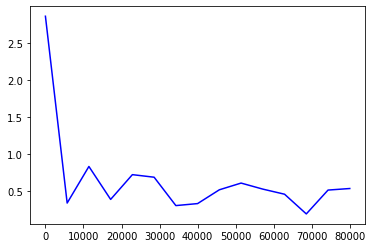

In [33]:
import numpy as np
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

X_new = pd.DataFrame()
# create a sequence of 100 evenly spaced numbers from 0 to 55
X_new["Price"] = np.linspace(0, 80000, num=15)

y = func(model.predict(X_new), 2.5, 1.3, 0.5)
np.random.seed(1729)
y_noise = 0.2 * np.random.normal(size=X_new.size)
ydata = y + y_noise

#car_df_train.plot.scatter(x="Price", y="Mile")
plt.plot(X_new, ydata, 'b-', label='data')

**This plot can show us how the mile and prices are distributing just not as a straight line.** 

# Build a better model
**We can use cross-validation method for our prediction** 

In [34]:
X_train = car_df_train.copy(deep=True) # copy the dataframe 
X_train = X_train[["Price","Mile"]] 

X_train.head(2)

,Price,Mile
0,14495.0,37874
1,14495.0,37874


In [35]:
X_test = car_df_test.copy(deep=True) # copy the dataframe 
X_test = X_test[["Price","Mile"]]
X_test.head(2)

,Price,Mile
0,14495.0,37874
1,14495.0,37874


In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

# pipeline and fit to training set
pipeline = make_pipeline(
    StandardScaler(),
    SGDRegressor()
)
pipeline.fit(X=X_train, y=y_train)
    
scores = cross_val_score(pipeline, 
                         X=X_train,
                         y=y_train,
                         cv=5)  # cv refers to number of cross-validation cuts
scores

array([0.99999999, 0.99999997, 0.99999998, 0.99999998, 0.99999999])

In [37]:
Y_predict = pipeline.predict(X=X_test)
output=pd.DataFrame(data={"Brand":car_df_test["Brand"],"Mile":Y_predict}) 
output.head(10)

,Brand,Mile
0,Acura,37872.050977
1,Acura,37872.050977
2,Acura,29315.978081
3,Acura,22731.778318
4,Acura,0.571005
5,Acura,61963.711037
6,Acura,62978.103295
7,Acura,85118.320264
8,Acura,162984.543928
9,Acura,124750.616785


Now, this output of our data frame has more sense about miles since even brand new cars can not have 0 miles, due to transfers to different dealerships. Even you buy a new car, the mileage of that car is not 0, so with our model, we can predict this and get a better result. 

#### We can do this prediction on Prices

In [38]:
X_train = car_df_train.copy(deep=True) # copy the dataframe 
X_train = X_train[["Price"]] 

X_train.head(2)

,Price
0,14495.0
1,14495.0


In [39]:
X_test = car_df_test.copy(deep=True) # copy the dataframe 
X_test = X_test[["Price"]]
X_test.head(2)

,Price
0,14495.0
1,14495.0


In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1, n_estimators=10)
reg2 = RandomForestRegressor(random_state=1, n_estimators=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)


Y_predict = ereg.predict(X=X_test)
output=pd.DataFrame(data={"Brand":car_df_test["Brand"],"Price":Y_predict})

In [41]:
print("Output new list of our cars with new prediction price :\n\n")
output

Output new list of our cars with new prediction price :




,Brand,Price
0,Acura,29924.944562
1,Acura,29924.944562
2,Acura,19269.821053
3,Acura,25416.344185
4,Acura,6321.624853
...,...,...
28781,smart,39328.948374
28782,smart,43867.184643
28783,smart,39328.948374
28784,smart,41698.664858


### Hypotheses :
We did our visualization regarding Brands, Miles, EXT_color(body colors), zip-code, type of cars, Year,  and **Price**. we built our model based on these categories. we saw that zip-code with Mile and car brands would change our prediction. we can make our model and prediction based on these areas and zip code much better when we collect more data from different sources. Since we added Brand we received a better number, and compared some brands with the same specification and saw our result.

In the end, we used two different models for miles prediction and price and we saw the result, we also can replace them into our original dataset, and do more, and different visualization. We choose to build the model on these two categories since these two are the most important part of cars, and for new cars, 0 mileage is not making sense, better become with a number. 

**I hope this project gives people some idea about which future of cars is important, how brands matter, what color is more popular in the market, etc.**   